In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedKFold, cross_val_score,  RandomizedSearchCV
from scipy.stats import loguniform
import seaborn as sns
import matplotlib.pyplot as plt
import time


In [22]:
data = pd.read_csv('../data-preprocessing/data/processed/titanic_preprocessed.csv')
data.head()

X = data.drop('Survived', axis=1) # We `drop` the target column from features
y = data['Survived']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the data into training and testing sets 20% test size 80% train size

FileNotFoundError: [Errno 2] No such file or directory: '../data-preprocessing/data/processed/titanic_preprocessed.csv'

In [ ]:
# Training the Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Evaluate using Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning using RandomizedSearchCV
param_dist = {
    'max_depth': [3, 5, 10, 15, 20, None], # Different depths for the tree
    'min_samples_split': [2, 5, 10, 15], # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10], # Minimum samples required at a leaf node
    'criterion': ['gini', 'entropy'] # Splitting criteria
}

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=50,
    cv=skf,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1)

time_start = time.time()
random_search.fit(X_train, y_train)
time_end = time.time()

best_model = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Best Hyperparameters:", random_search.best_params_)
print(f"Test Set Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizing the Confusion Matrix
print(f"RandomizedSearchCV took {time_end - time_start:.2f} seconds to complete.")


Best Hyperparameters: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'criterion': 'entropy'}
Test Set Accuracy: 0.7989
Confusion Matrix:
 [[92 13]
 [23 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

RandomizedSearchCV took 0.24 seconds to complete.


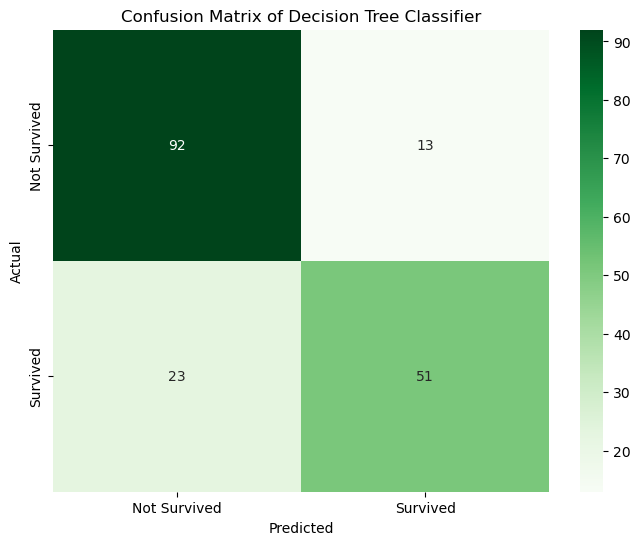

In [ ]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix of Decision Tree Classifier')
plt.show()

/tmp/ipykernel_14365/3935267357.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


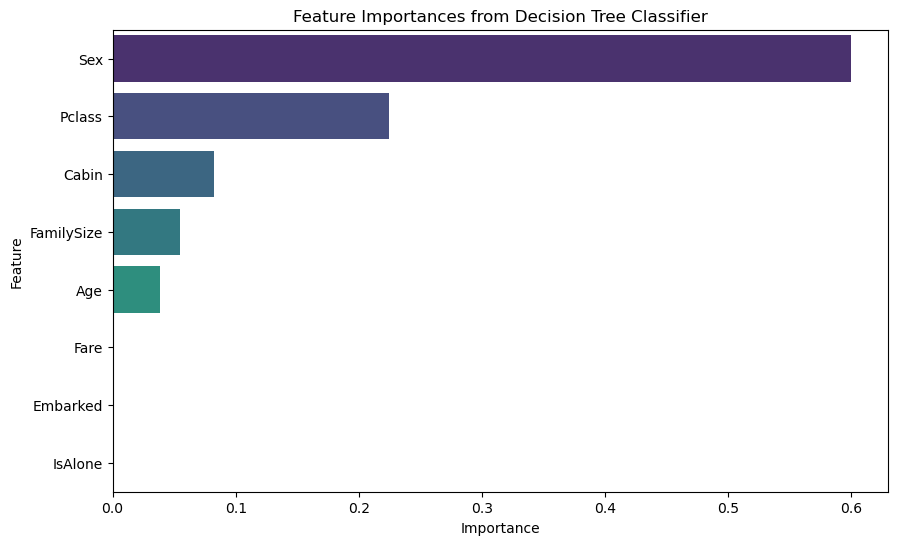

In [ ]:
# Feature Importance Visualization
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importances from Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()